In [3]:
import json

with open("../dataset/images_flat_2.json", "r") as dataset:
    data = json.load(dataset)
    
imgs_as_lists = [movie["image"] for movie in data]
genres = [movie["genre"] for movie in data]

In [4]:
!pip show projetannuel

Name: ProjetAnnuel
Version: 0.1.1
Summary: 
Home-page: 
Author: 
Author-email: 
License: 
Location: D:\Users\hadinao\Documents\Cours_ESGI\PA\ProjetAnnuel\venv\Lib\site-packages
Requires: 
Required-by: 


In [2]:
import projetannuel

y = projetannuel.string_labels(genres)

model = projetannuel.LinearModel(
    imgs_as_lists,
    y
)

In [3]:
model.train_classification(epochs=10000, learning_rate=0.001)

Ici ça passe


In [4]:
y_pred = []
for img in imgs_as_lists:
    y_pred.append(model.predict(img))

In [5]:
print(y_pred)

['Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Ho

In [6]:
projetannuel.accuracy_score(genres, y_pred)

0.5941666666666666

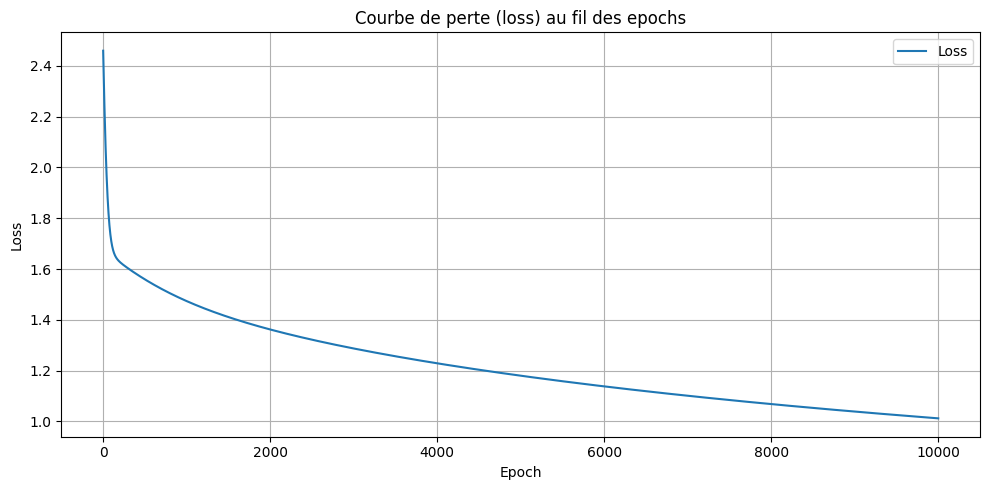

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## MLP

In [5]:
genres_binary = [[0] if x=="Animation" else [1] for x in genres]
len(genres_binary)

1160

In [20]:
import projetannuel as pa
model = pa.MLP([1200, 256,128,64, 1])
model.train(imgs_as_lists,genres_binary,2000,0.01,True)
y_pred = [model.predict(x,True)[0] for x in imgs_as_lists]

Epoch 0 – BCE: 0.000000
Epoch 100 – BCE: 0.000000
Epoch 200 – BCE: 0.120570
Epoch 300 – BCE: 17.376780
Epoch 400 – BCE: 0.000001
Epoch 500 – BCE: 0.000001
Epoch 600 – BCE: 10.416417
Epoch 700 – BCE: 0.000304
Epoch 800 – BCE: 12.639207
Epoch 900 – BCE: 11.034078
Epoch 1000 – BCE: 0.000000
Epoch 1100 – BCE: 9.470326
Epoch 1200 – BCE: 0.011247
Epoch 1300 – BCE: 7.548110
Epoch 1400 – BCE: 10.408160
Epoch 1500 – BCE: 0.000005
Epoch 1600 – BCE: 0.000003
Epoch 1700 – BCE: 0.000000
Epoch 1800 – BCE: 0.327357
Epoch 1900 – BCE: 0.000000


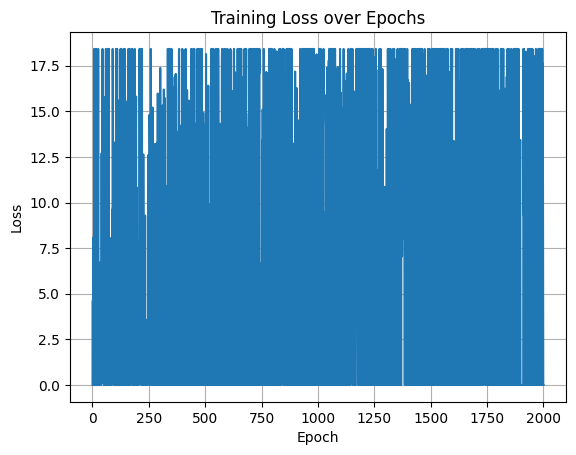

In [21]:
import matplotlib.pyplot as plt

# loss is a Python list of floats
loss = model.loss  

# x-axis = epoch number
epochs = list(range(1, len(loss) + 1))

plt.plot(epochs, loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()


In [23]:
genres_binary_2 = [x[0] for x in genres_binary]

In [29]:
y_pred = [0 if x<0.5 else 1 for x in y_pred]
y_pred.count(1)

1160

In [24]:
pa.accuracy_score(genres_binary_2, y_pred)

0.49224137931034484